<h1>MAJOR PROJECT</h1> 

<h3>PROBLEM STATEMENT :</h3>

WHO has hired you for working on the dataset of COVID 19. Aggregate data and within TWO days present your point of view to the joint committee on strategic planning to fight against COVID 19 on<br>
A. Present state analytics – Uttarpradesh<br>
B. Correlation heatmap for various parameters<br>
C. Build a model for predicting the confirmed and recovered on any dates past 15th July 2020<br>
D. Build a classifier for severity gauging


#  STATE ANALYSIS - UTTARPRADESH


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand  

In [2]:
dataset = pd.read_csv('up_wholedata.csv')
dataset.head()

,Date,State,Total_Confirmed,Death,Cured,New_cases,New_deaths,New_recovered
0,04-03-2020,Uttar Pradesh,6,0,0,0,0,0
1,05-03-2020,Uttar Pradesh,7,0,0,1,0,0
2,06-03-2020,Uttar Pradesh,7,0,0,0,0,0
3,07-03-2020,Uttar Pradesh,7,0,0,0,0,0
4,08-03-2020,Uttar Pradesh,7,0,0,0,0,0


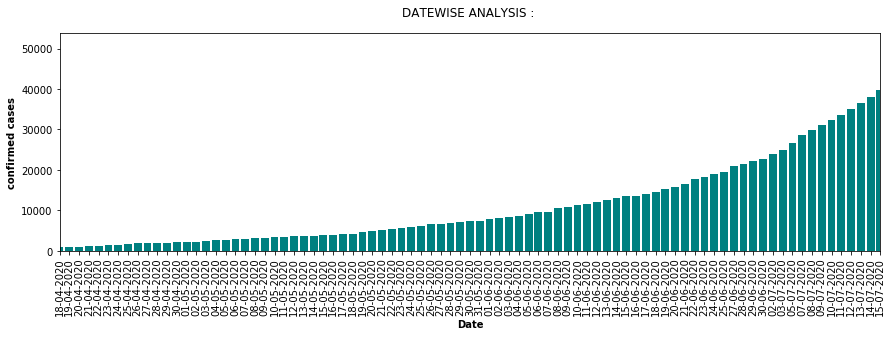

In [3]:
fig, ax = plt.subplots()
plt.xlabel('Date', fontweight='bold')
plt.ylabel('confirmed cases', fontweight='bold')
ttl1=plt.title('DATEWISE ANALYSIS : ')
ttl1.set_position([.5, 1.05])

plt.bar('Date','Total_Confirmed',data=dataset.head(135),color='teal',label='confirmed cases')

plt.xlim(dataset.Date[45],dataset.Date[129])
plt.xticks(rotation='vertical')
plt.subplots_adjust(-1)

plt.show()

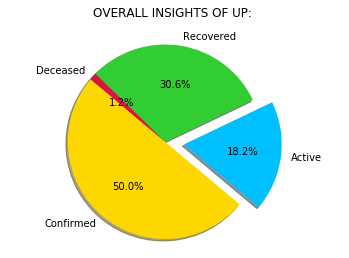

In [4]:
#pie chart giving full insights of cases in UP till now

labels = 'Confirmed', 'Active','Recovered', 'Deceased'
sizes = [45163,16445,27634,1084]
colors = ['gold', 'deepskyblue', 'limegreen', 'crimson']
explode = (0,0.2,0,0)  

ttl=plt.title('OVERALL INSIGHTS OF UP: ')
ttl.set_position([.5, 1.05])
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

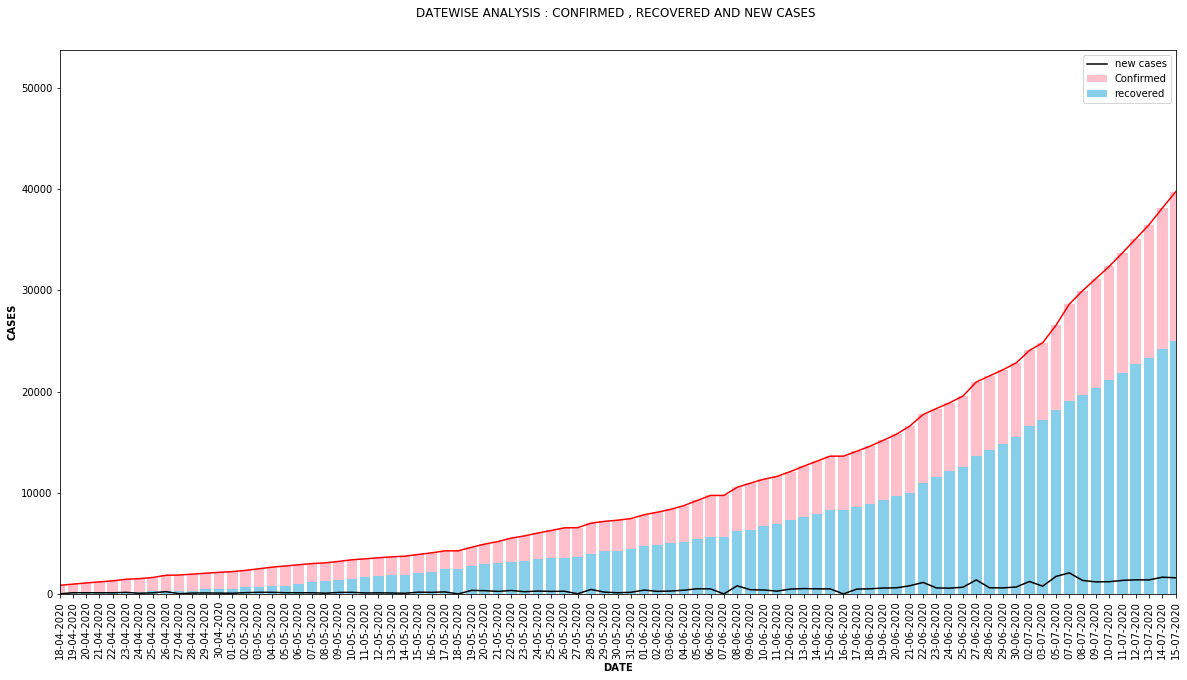

In [5]:
plt.figure(figsize=(20,10))
plt.bar(dataset.Date.head(135),dataset.Total_Confirmed.head(135),label='Confirmed',color='pink')
plt.plot(dataset.Date.head(135),dataset.Total_Confirmed.head(135),color='red')
plt.bar('Date','Cured',data=dataset.head(135),color='skyblue',label='recovered')
plt.plot(dataset.Date.head(135),dataset.New_cases.head(135),color='black',label='new cases')
plt.legend()
plt.xlim(dataset.Date[45],dataset.Date[129])
plt.xticks(rotation=90)
ttl1=plt.title('DATEWISE ANALYSIS : CONFIRMED , RECOVERED AND NEW CASES ')
ttl1.set_position([.5, 1.05])
plt.xlabel('DATE', fontweight='bold')
plt.ylabel('CASES', fontweight='bold')
plt.show()

# HEATMAP : CORRELATION BETWEEN PARAMETERS OF UTTARPRADESH     DATE WISE DATA

In [6]:
data=dataset[['Total_Confirmed','Death','Cured']]
print(data.corr(method ='pearson'))

                 Total_Confirmed     Death     Cured
Total_Confirmed         1.000000  0.990487  0.998679
Death                   0.990487  1.000000  0.993781
Cured                   0.998679  0.993781  1.000000


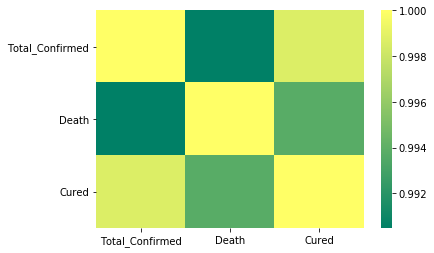

In [7]:
sns.heatmap(data.corr(),cmap='summer')

# PREDICTION OF CONFIRMED CASES IN UTTARPREDESH

In [8]:
x = dataset[['Date','Death','Cured','New_cases','New_deaths','New_recovered']].values
y = dataset[['Total_Confirmed']]

In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

labelencoder = LabelEncoder()
x[:,0] = labelencoder.fit_transform(x[:,0])

In [10]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [11]:

y_test.shape

(29, 1)

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = reg.predict(x_test)
print(y_pred)

[[  642.47746956]
 [ 1430.81798065]
 [  491.52046687]
 [  989.04805571]
 [ 2475.89968711]
 [  860.19418575]
 [ 3502.30684135]
 [ 1106.73120816]
 [32078.64779392]
 [  508.68659188]
 [ 4859.75968042]
 [  657.43539313]
 [35063.71537422]
 [31507.76235019]
 [33204.06606967]
 [10817.08617829]
 [13735.5909578 ]
 [ 6487.68143738]
 [  430.9353256 ]
 [ 1264.23692671]
 [ 8067.82448388]
 [  768.19426514]
 [55376.5080024 ]
 [  809.13155146]
 [  407.11541456]
 [17744.06557682]
 [  842.62030826]
 [30858.63901139]
 [  694.77912154]]


In [14]:
print(reg.coef_)
print(reg.intercept_)

[[ 3.433225   -7.60403978  1.87340872  1.00382613 32.51374713 -2.60073515]]
[338.45091452]


In [15]:
y_test

,Total_Confirmed
45,849
60,2487
7,9
51,1510
66,3214
27,101
71,3729
54,1868
123,31156
8,11


In [16]:
y_pred

array([[  642.47746956],
       [ 1430.81798065],
       [  491.52046687],
       [  989.04805571],
       [ 2475.89968711],
       [  860.19418575],
       [ 3502.30684135],
       [ 1106.73120816],
       [32078.64779392],
       [  508.68659188],
       [ 4859.75968042],
       [  657.43539313],
       [35063.71537422],
       [31507.76235019],
       [33204.06606967],
       [10817.08617829],
       [13735.5909578 ],
       [ 6487.68143738],
       [  430.9353256 ],
       [ 1264.23692671],
       [ 8067.82448388],
       [  768.19426514],
       [55376.5080024 ],
       [  809.13155146],
       [  407.11541456],
       [17744.06557682],
       [  842.62030826],
       [30858.63901139],
       [  694.77912154]])

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9957361680907166

In [18]:
#decoding the dates of the dataset
date=[]
for i in range(0,len(x_test)):
    dt=x_test[i][0]
    date.append(dt)

date = labelencoder.inverse_transform(date)
date

array(['18-04-2020', '03-05-2020', '11-03-2020', '24-04-2020',
       '09-05-2020', '31-03-2020', '14-05-2020', '27-04-2020',
       '09-07-2020', '12-03-2020', '19-05-2020', '20-03-2020',
       '11-07-2020', '08-07-2020', '10-07-2020', '10-06-2020',
       '17-06-2020', '26-05-2020', '06-04-2020', '29-04-2020',
       '03-06-2020', '26-03-2020', '24-07-2020', '28-03-2020',
       '06-03-2020', '23-06-2020', '30-03-2020', '07-07-2020',
       '22-03-2020'], dtype=object)

In [19]:
#creating arrays
pred=[]
for i in range(0,len(y_pred)):
    dt=y_pred[i][0]
    pred.append(dt)

actual=[]
test=np.asarray(y_test)
for i in range(0,len(test)):
    dt=test[i][0]
    actual.append(dt)
    
    


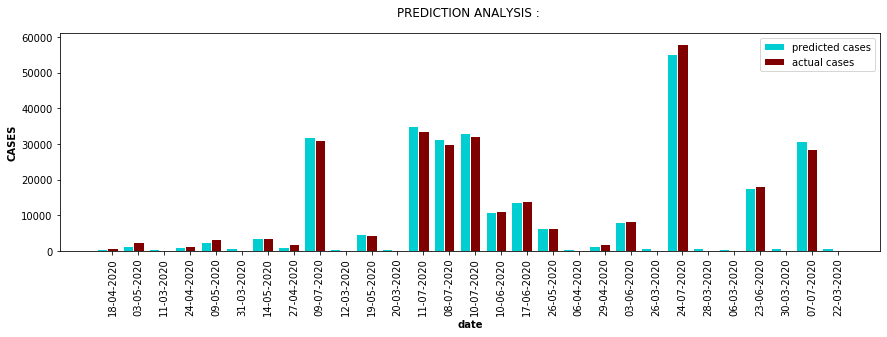

In [20]:

barWidth = 0.4

bars1 =pred
bars2 =actual

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='darkturquoise', width=barWidth, edgecolor='white', label='predicted cases')
plt.bar(r2, bars2, color='maroon', width=barWidth, edgecolor='white', label='actual cases')

# Add xticks on the middle of the group bars
plt.xlabel('date', fontweight='bold')
plt.ylabel('CASES', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars2))],date,rotation=90 )
ttl1=plt.title('PREDICTION ANALYSIS : ')
ttl1.set_position([.5, 1.05]) 

# Create legend & Show graphic
plt.legend()
plt.subplots_adjust(-1)
plt.show()



# STATE WISE DATA ANALYSIS

In [21]:
dataset2 = pd.read_csv('state data(final).csv')
dataset2.head()

,State,Confirmed,Active,Recovered,Deceased,TOTAL_POPULATION
0,Andaman and Nicobar,194,52,142,0,380581
1,Andhra Pradesh,40646,19814,20298,534,84580777
2,Arunachal Pradesh,609,431,175,3,1383727
3,Assam,20646,6490,14105,51,31205576
4,Bihar,23589,8767,14621,201,104099452


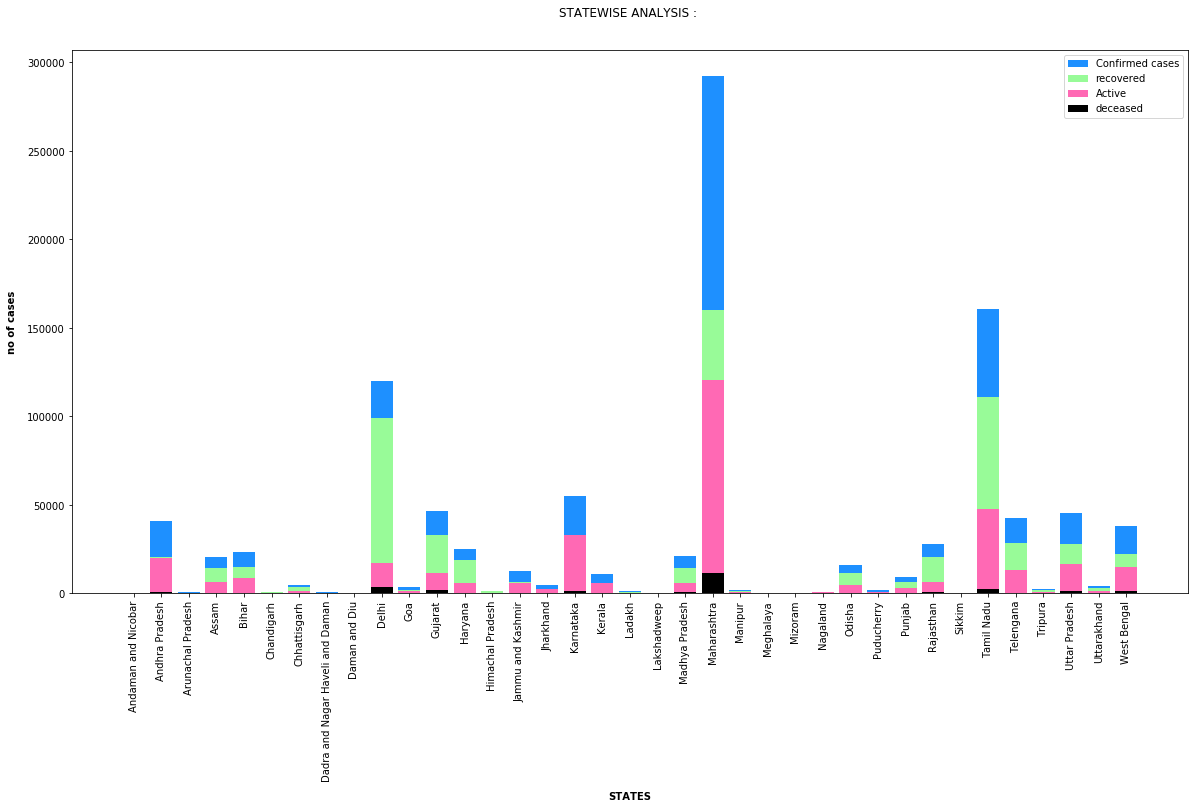

In [22]:
plt.figure(figsize=(20,10))
plt.bar(dataset2.State,dataset2.Confirmed,label='Confirmed cases',color='dodgerblue')
plt.bar(dataset2.State,dataset2.Recovered,label='recovered',color='palegreen')
plt.bar(dataset2.State,dataset2.Active ,color='hotpink',label='Active')
plt.bar(dataset2.State,dataset2.Deceased,label='deceased',color='black')
plt.legend()
ttl1=plt.title('STATEWISE ANALYSIS : ')
ttl1.set_position([.5, 1.05]) 
plt.xticks(dataset2.State,rotation=90)
plt.xlabel("STATES",labelpad=10,fontweight='bold')
plt.ylabel("no of cases",labelpad=10,fontweight='bold')
plt.show()


# HEATMAP: CORRELATION BETWEEN PARAMETERS OF STATE WISE DATA

In [23]:
data=dataset2[['Confirmed','Active','Recovered','Deceased']]
print(data.corr(method ='pearson'))

           Confirmed    Active  Recovered  Deceased
Confirmed   1.000000  0.959989   0.983172  0.945849
Active      0.959989  1.000000   0.892905  0.943052
Recovered   0.983172  0.892905   1.000000  0.901989
Deceased    0.945849  0.943052   0.901989  1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

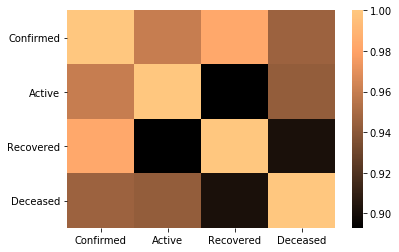

In [24]:
sns.heatmap(data.corr(),cmap='copper')
plt.yticks(rotation=0) 
